In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn as sk
from sklearn import linear_model

In [4]:
pip install openpyxl

     |████████████████████████████████| 251 kB 4.7 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
#waiting on the csv file with historical data to continue
#not a csv, instead it is an xlsx

#data starts from 05-27-2004. 
#notice how few of the mag 7s don't have data till after 2004 so there are NaNs.

qdd = pd.read_excel('QuantDevData.xlsx')
qdd.head()



,Unnamed: 0,AMZN US Equity,AMZN US Equity.1,AMZN US Equity.2,AMZN US Equity.3,MSFT US Equity,MSFT US Equity.1,MSFT US Equity.2,MSFT US Equity.3,NVDA US Equity,...,AAPL US Equity.2,AAPL US Equity.3,META US Equity,META US Equity.1,META US Equity.2,META US Equity.3,TSLA US Equity,TSLA US Equity.1,TSLA US Equity.2,TSLA US Equity.3
0,DATES,#Open,#High,#Low,#Close,#Open,#High,#Low,#Close,#Open,...,#Low,#Close,#Open,#High,#Low,#Close,#Open,#High,#Low,#Close
1,2004-05-27 00:00:00,2.263,2.3915,2.2425,2.381,26.16,26.19,25.92,26.19,1.905833,...,0.496786,0.503036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-05-28 00:00:00,2.3635,2.434,2.344,2.425,26.14,26.35,26.02,26.23,1.9,...,0.496429,0.501071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-06-01 00:00:00,2.394,2.5225,2.385,2.5115,26.11,26.27,25.87,26.11,1.925833,...,0.493036,0.501071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-06-02 00:00:00,2.5225,2.5605,2.4885,2.5175,26.13,26.28,26.01,26.13,2.008333,...,0.496429,0.516429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#CHECK TO SEE UP TO WHAT DATE WE HAVE DATA FOR
#results show until 5/24/2024 (which is when the last day market was open when inquired for data)
qdd.tail()

,Unnamed: 0,AMZN US Equity,AMZN US Equity.1,AMZN US Equity.2,AMZN US Equity.3,MSFT US Equity,MSFT US Equity.1,MSFT US Equity.2,MSFT US Equity.3,NVDA US Equity,...,AAPL US Equity.2,AAPL US Equity.3,META US Equity,META US Equity.1,META US Equity.2,META US Equity.3,TSLA US Equity,TSLA US Equity.1,TSLA US Equity.2,TSLA US Equity.3
5029,2024-05-20 00:00:00,184.34,186.665,183.28,183.54,420.21,426.77,419.99,425.34,937.5,...,189.01,191.04,469.95,473.2,467.04,468.84,177.56,177.754,173.52,174.95
5030,2024-05-21 00:00:00,182.3,183.26,180.75,183.15,426.825,432.97,424.85,429.04,935.99,...,190.9201,192.35,467.12,470.7,462.27,464.63,175.51,186.875,174.71,186.6
5031,2024-05-22 00:00:00,183.88,185.22,181.9715,183.13,430.09,432.41,427.13,430.52,954.59,...,190.27,190.9,467.87,473.7199,465.65,467.78,182.85,183.8,178.12,180.11
5032,2024-05-23 00:00:00,183.66,184.76,180.08,181.05,432.97,433.6,425.424,427,1020.28,...,186.625,186.88,472.88,474.3581,461.54,465.78,181.8,181.9,173.26,173.74
5033,2024-05-24 00:00:00,181.65,182.435,180.3,180.75,427.19,431.055,424.41,430.16,1044.49,...,188.0404,189.98,467.62,479.8499,466.3,478.22,174.835,180.08,173.73,179.24


In [8]:
#notice how the data type is OBJECT and not numeric
#must change
print(qdd.dtypes)

Unnamed: 0           object
AMZN US Equity       object
AMZN US Equity.1     object
AMZN US Equity.2     object
AMZN US Equity.3     object
MSFT US Equity       object
MSFT US Equity.1     object
MSFT US Equity.2     object
MSFT US Equity.3     object
NVDA US Equity       object
NVDA US Equity.1     object
NVDA US Equity.2     object
NVDA US Equity.3     object
GOOGL US Equity      object
GOOGL US Equity.1    object
GOOGL US Equity.2    object
GOOGL US Equity.3    object
AAPL US Equity       object
AAPL US Equity.1     object
AAPL US Equity.2     object
AAPL US Equity.3     object
META US Equity       object
META US Equity.1     object
META US Equity.2     object
META US Equity.3     object
TSLA US Equity       object
TSLA US Equity.1     object
TSLA US Equity.2     object
TSLA US Equity.3     object
dtype: object


In [9]:
qdd = qdd.map(lambda x: pd.to_numeric(x, errors='coerce'))

In [10]:
#change the name of the columns for easier access/read
qdd.columns = [
    'DATES',
    'AMZN OPEN',
    'AMZN HIGH',
    'AMZN LOW',
    'AMZN CLOSE',
    'MSFT OPEN',
    'MSFT HIGH',
    'MSFT LOW',
    'MSFT CLOSE',
    'NVDA OPEN',
    'NVDA HIGH',
    'NVDA LOW',
    'NVDA CLOSE',
    'GOOGL OPEN',
    'GOOGL HIGH',
    'GOOGL LOW',
    'GOOGL CLOSE',
    'AAPL OPEN',
    'AAPL HIGH',
    'AAPL LOW',
    'AAPL CLOSE',
    'META OPEN',
    'META HIGH',
    'META LOW',
    'META CLOSE',
    'TSLA OPEN',
    'TSLA HIGH',
    'TSLA LOW',
    'TSLA CLOSE',
]

In [11]:
#check updated column names while also removing the first row
#first row had DATES and OHLS 
qdd = qdd.drop(0)

In [12]:
qdd.head()

,DATES,AMZN OPEN,AMZN HIGH,AMZN LOW,AMZN CLOSE,MSFT OPEN,MSFT HIGH,MSFT LOW,MSFT CLOSE,NVDA OPEN,...,AAPL LOW,AAPL CLOSE,META OPEN,META HIGH,META LOW,META CLOSE,TSLA OPEN,TSLA HIGH,TSLA LOW,TSLA CLOSE
1,NaN,2.2630,2.3915,2.2425,2.3810,26.16,26.19,25.92,26.19,1.905833,...,0.496786,0.503036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.3635,2.4340,2.3440,2.4250,26.14,26.35,26.02,26.23,1.900000,...,0.496429,0.501071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2.3940,2.5225,2.3850,2.5115,26.11,26.27,25.87,26.11,1.925833,...,0.493036,0.501071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2.5225,2.5605,2.4885,2.5175,26.13,26.28,26.01,26.13,2.008333,...,0.496429,0.516429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,2.4965,2.5175,2.4660,2.4700,26.05,26.13,25.86,25.89,1.938333,...,0.505179,0.507143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Linear Regression
#### Y = what we are looking for. 
The likelihood of picking one equity over another? 
If so, how to determine the outcome/likelihood overall?
Based on projected returns (with X being closing prices of other 6 stocks)
OR based off the implications of predicted stock price for each equity

In [13]:
#attempt with the implications of predicted stock RETURNS for each (run 7 models)

Y = qdd['AMZN CLOSE']
X = qdd[['MSFT CLOSE','NVDA CLOSE','GOOGL CLOSE','AAPL CLOSE','META CLOSE','TSLA CLOSE']]

In [14]:
data = pd.concat([Y,X],axis=1)
data.describe()

,AMZN CLOSE,MSFT CLOSE,NVDA CLOSE,GOOGL CLOSE,AAPL CLOSE,META CLOSE,TSLA CLOSE
count,5033.000000,5033.000000,5033.000000,4977.000000,5033.000000,3025.000000,3502.000000
mean,48.619797,96.326340,67.976723,44.126406,46.521099,167.738796,73.777809
std,56.134892,104.109325,142.539619,41.288054,56.164726,104.979520,101.907438
min,1.303500,15.150000,0.785833,2.127061,0.501071,17.729000,1.053333
25%,4.334500,27.580000,3.555000,13.038335,6.335357,82.275000,11.277000
50%,16.372000,40.500000,5.625000,27.434500,23.372500,160.030000,17.305333
75%,89.788500,128.070000,58.825000,59.869000,52.252500,214.750000,144.676667
max,189.500000,430.520000,1064.690000,177.850000,198.110000,527.340000,409.970000


In [15]:
#will remove the NaN values to calculate returns
# Drop rows with any NaN values
data_clean = data.dropna()
data_clean

,AMZN CLOSE,MSFT CLOSE,NVDA CLOSE,GOOGL CLOSE,AAPL CLOSE,META CLOSE,TSLA CLOSE
2009,10.9180,29.72,3.1625,15.591359,18.932857,38.000000,1.904667
2010,10.6925,29.27,3.0200,15.024560,18.942143,38.231812,1.837333
2011,10.9055,29.75,3.0725,15.367642,20.045714,34.030000,1.918000
2012,10.7665,29.76,3.0350,15.034569,19.891786,31.000000,2.052667
2013,10.8640,29.11,3.1100,15.251279,20.377143,32.000000,2.068000
...,...,...,...,...,...,...,...
5029,183.5400,425.34,947.8000,176.920000,191.040000,468.840000,174.950000
5030,183.1500,429.04,953.8600,177.850000,192.350000,464.630000,186.600000
5031,183.1300,430.52,949.5000,176.380000,190.900000,467.780000,180.110000
5032,181.0500,427.00,1037.9900,173.550000,186.880000,465.780000,173.740000


In [16]:
data_return = data_clean.apply(lambda x: x.pct_change())

In [17]:
data_return.head()

,AMZN CLOSE,MSFT CLOSE,NVDA CLOSE,GOOGL CLOSE,AAPL CLOSE,META CLOSE,TSLA CLOSE
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,-0.020654,-0.015141,-0.045059,-0.036353,0.000490,0.006100,-0.035352
2011,0.019921,0.016399,0.017384,0.022835,0.058260,-0.109904,0.043904
2012,-0.012746,0.000336,-0.012205,-0.021674,-0.007679,-0.089039,0.070212
2013,0.009056,-0.021841,0.024712,0.014414,0.024400,0.032258,0.007470


In [18]:
data_return.drop(2009)

,AMZN CLOSE,MSFT CLOSE,NVDA CLOSE,GOOGL CLOSE,AAPL CLOSE,META CLOSE,TSLA CLOSE
2010,-0.020654,-0.015141,-0.045059,-0.036353,0.000490,0.006100,-0.035352
2011,0.019921,0.016399,0.017384,0.022835,0.058260,-0.109904,0.043904
2012,-0.012746,0.000336,-0.012205,-0.021674,-0.007679,-0.089039,0.070212
2013,0.009056,-0.021841,0.024712,0.014414,0.024400,0.032258,0.007470
2014,-0.009389,-0.001374,-0.026527,-0.009517,-0.009184,0.032188,-0.022566
...,...,...,...,...,...,...,...
5029,-0.006280,0.012208,0.024881,0.004885,0.006162,-0.006505,-0.014144
5030,-0.002125,0.008699,0.006394,0.005257,0.006857,-0.008980,0.066590
5031,-0.000109,0.003450,-0.004571,-0.008265,-0.007538,0.006780,-0.034780
5032,-0.011358,-0.008176,0.093196,-0.016045,-0.021058,-0.004276,-0.035367


In [19]:
data_return.fillna(0, inplace=True)

In [20]:
#reassign X and Y to the new columns with no NaNs

Y = data_return['AMZN CLOSE']
X = data_return[['MSFT CLOSE','NVDA CLOSE','GOOGL CLOSE','AAPL CLOSE','META CLOSE','TSLA CLOSE']]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [22]:
from sklearn import linear_model
OLS = linear_model.LinearRegression()

In [23]:
OLS.fit(X_train, y_train)

LinearRegression()

In [24]:
print("OLS.intercept_:", OLS.intercept_)
print("OLS.coef_:", OLS.coef_)

OLS.intercept_: -3.725701134187217e-05
OLS.coef_: [0.24138499 0.05759234 0.30992012 0.0567662  0.14522956 0.04960581]


In [25]:
#obtain dictionary mapping column name with corresponding coefficient
d = {X.columns[i]:OLS.coef_[i] for i in range(0, len(OLS.coef_))}

In [26]:
s = pd.Series(d)
s

MSFT CLOSE     0.241385
NVDA CLOSE     0.057592
GOOGL CLOSE    0.309920
AAPL CLOSE     0.056766
META CLOSE     0.145230
TSLA CLOSE     0.049606
dtype: float64

In [27]:
y_pred = OLS.predict(X_test)
y_pred.shape

(757,)

In [28]:
#scores correspond to R^2. Discussed more below
print("Training set score: {:.4f}".format(OLS.score(X_train, y_train)))
print("Test set score: {:.4f}".format(OLS.score(X_test, y_test)))

Training set score: 0.4615
Test set score: 0.5453


LinearRegression()

Mean Squared Error: 0.00020183220588351812
R-squared: 0.5580063832428181


Text(0.5, 0, 'Predicted Returns')

Text(0, 0.5, 'Residuals')

Text(0.5, 1.0, 'Residuals vs Predicted Returns')

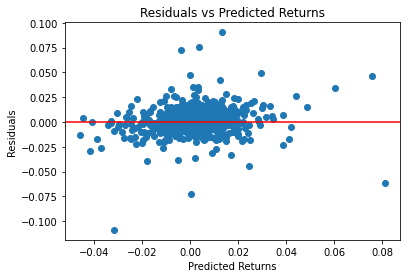

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'data_return' is your DataFrame with percentage returns
Y = data_return['AMZN CLOSE']  # Target variable
X = data_return[['MSFT CLOSE', 'NVDA CLOSE', 'GOOGL CLOSE', 'AAPL CLOSE', 'META CLOSE', 'TSLA CLOSE']]  # Features

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')


r_squared = model.score(X_test, y_test)
print(f'R-squared: {r_squared}')

import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Returns')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Returns')
plt.show()

#### Initial look, WTF is are those training/test scores...
<ul>
    Need to multiply by daily return percentage. Considering the intercept is -3.72, I want to say everything will be wrong.
    </ul>
AMZN = (MSFT*0.241385)+(NVDA*0.057592)+(GOOGL*0.309920)+(AAPL*0.056766)+(META*0.145230)+(TSLA*0.049606)-3.725701

<ul>
    -3.72% vs. 0.47%
    </ul>

### Wow that difference is abysmal. Linear Regression won't work for sure.